In [198]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chisquare
from scipy.stats import shapiro, normaltest, norm
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as ticker
df = pd.read_csv('./data/data.csv')
df.dropna(inplace=True)
df['Main Genre'] = df['Genres'].str.split(',').str[0].str.strip()
prog =0

Chi2 = 292.04, p-value = 0.000


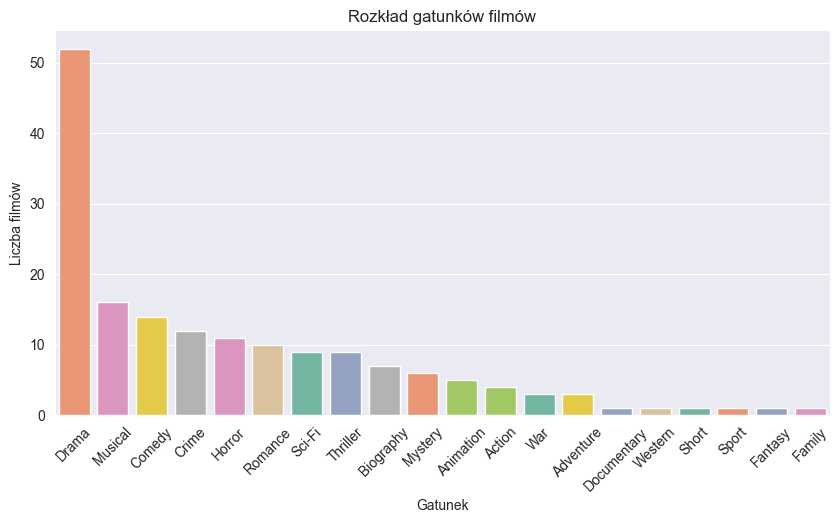

In [199]:
# Sprawdzenie, czy rozkład jest równomierny
observed = df['Main Genre'].value_counts().values
expected = [len(df)/len(observed)] * len(observed)
chi2, p = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi2 = {chi2:.2f}, p-value = {p:.3f}")
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Main Genre', order=df['Main Genre'].value_counts().index, palette='Set2',hue='Main Genre')
plt.title('Rozkład gatunków filmów')
plt.xlabel('Gatunek')
plt.ylabel('Liczba filmów')
plt.xticks(rotation=45)
plt.show()

time.sleep(1)

if p < 0.05:
    prog = input('Rozklad nie jest rownomierny ustal próg min. liczby wystąpień gatunku (liczba całkowita) i kliknij enter')
prog = int(prog)
counts = df['Main Genre'].value_counts()

df = df[df['Main Genre'].isin(counts[counts >= prog].index)]

In [200]:
#Podstawowe statystyki opisowe
info = df.describe()
print(info)

       Your Rating  IMDb Rating  Runtime (mins)         Year     Num Votes
count   155.000000   155.000000      155.000000   155.000000  1.550000e+02
mean      7.212903     7.684516      122.167742  2001.780645  6.169626e+05
std       1.682558     0.761930       24.123820    19.559855  6.049618e+05
min       2.000000     5.200000       80.000000  1937.000000  4.170000e+02
25%       6.000000     7.300000      104.000000  1994.000000  1.692910e+05
50%       7.000000     7.800000      117.000000  2006.000000  4.281440e+05
75%       8.000000     8.200000      137.000000  2017.000000  9.003235e+05
max      10.000000     9.300000      206.000000  2025.000000  3.088170e+06


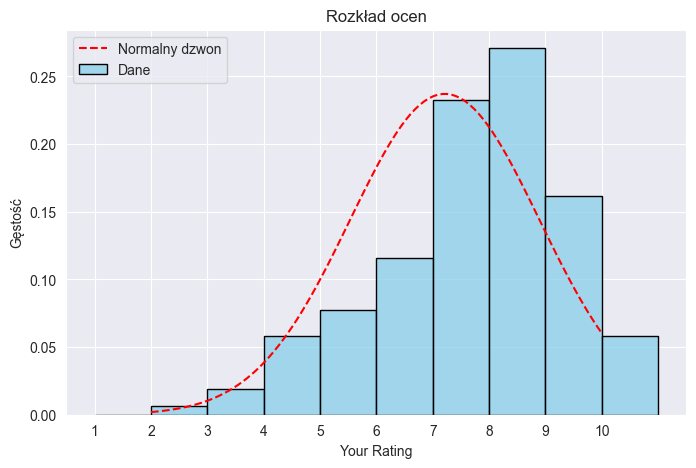

In [201]:
#Histogram ocen
data = df['Your Rating'].dropna()
plt.figure(figsize=(8,5))
sns.histplot(data, bins=range(1,12), stat="density", color="skyblue", edgecolor="black", label="Dane")



mu = data.mean()
sigma = data.std()

x = np.linspace(data.min(), data.max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), color='red', linestyle='--', label='Normalny dzwon')
plt.xticks(range(1,11))
plt.title("Rozkład ocen")
plt.xlabel('Your Rating')
plt.ylabel("Gęstość")
plt.legend()
plt.show()

In [ ]:
#Korelacja gatunek - ocena IMDb - moja ocena - czas trwania



df = df[df['Main Genre'].isin(counts[counts >= prog].index)]
subset = df[['Your Rating', 'Main Genre','IMDb Rating', 'Runtime (mins)']].copy()

le = LabelEncoder()
subset['Main Genre'] = le.fit_transform(subset['Main Genre'])

corr = subset.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Korelacja ocen do gatunku")

mapping = dict(zip(le.classes_, le.transform(le.classes_)))
mapping_text = "\n".join([f"{v} = {k}" for k, v in mapping.items()])

plt.gcf().text(1.05, 0.5, mapping_text, fontsize=9, va='center')

plt.tight_layout()
plt.show()

In [ ]:
#Wykres rozrzutu ocena IMDb - moja ocena
plt.scatter(df['IMDb Rating'], df['Your Rating'])
plt.title("IMDb Rating vs Your Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Your Rating")

plt.show()

In [ ]:
#Oceny danych gatunków


df = df[df['Main Genre'].isin(counts[counts >= prog].index)]
subset = df[['Your Rating', 'Main Genre']].copy()


le = LabelEncoder()
subset['Main Genre'] = le.fit_transform(subset['Main Genre'])

pivot = df.pivot_table(values="Your Rating", index="Main Genre", aggfunc="mean")

sns.heatmap(pivot, annot=True, cmap="coolwarm")

plt.title("Średnia ocena w zależności od gatunku")
plt.show()

In [ ]:
#Liczba wystąpień danego gatunku (jeśli mamy komedio-dramat to będzie policzone jako 2 filmy 1-dramat i 1-komedia)
genre_list = df['Genres'].str.split(',').sum()

genre_list = [g.strip() for g in genre_list]

print(pd.Series(genre_list).value_counts())

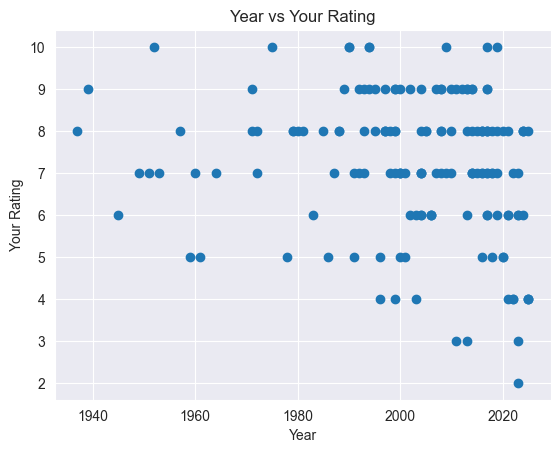

In [204]:
#Wykres rozrzutu ocena IMDb - moja ocena
plt.scatter(df['Year'], df['Your Rating'])
plt.title("Year vs Your Rating")
plt.xlabel("Year")
plt.ylabel("Your Rating")

plt.show()

In [203]:
#Najczęśćiej i najrzadziej oglądani reżyserzy
directors_df = df[['Directors']].copy()

directors_df['Watched_movies'] = directors_df['Directors'].map(df['Directors'].value_counts())

print(directors_df['Directors'].value_counts())


Directors
Christopher Nolan    6
Stanley Kubrick      4
Todd Phillips        3
Martin Scorsese      3
Milos Forman         3
                    ..
Mary Harron          1
McG                  1
Gus Van Sant         1
David Michôd         1
Michael Chaves       1
Name: count, Length: 122, dtype: int64


Rozkład liczby obejrzanych filmów dla reżyserów:
Watched_movies
1    101
2     13
3      6
4      1
6      1
Name: count, dtype: int64 

Chi2 = 304.56, p-value = 0.000


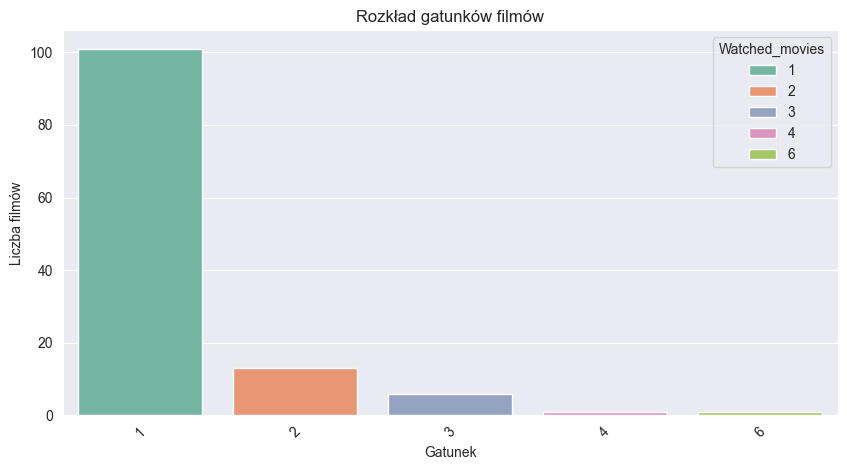

Reżyserzy, których obejrzałem co najmniej 3 filmy:
            Directors  Watched_movies
2     Martin Scorsese               3
13    Robert Zemeckis               3
20    Stanley Kubrick               4
33      Todd Phillips               3
46      David Fincher               3
65     Clint Eastwood               3
75  Christopher Nolan               6
93       Milos Forman               3 



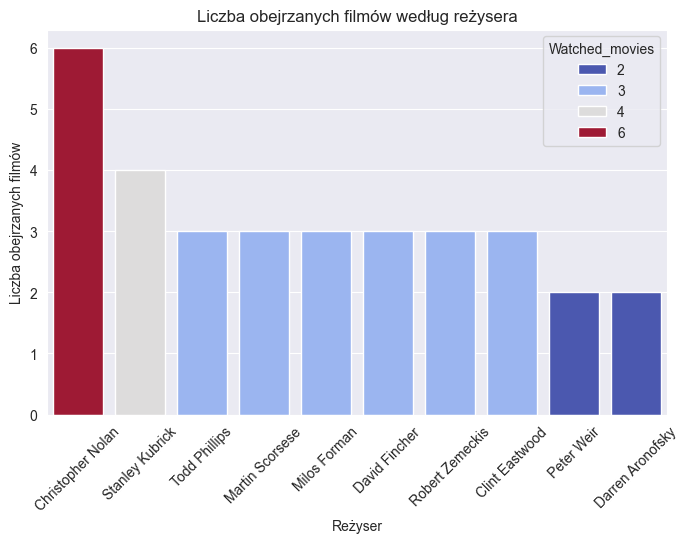

In [211]:

directors_df = df[['Directors']].drop_duplicates().copy()

directors_df['Watched_movies'] = directors_df['Directors'].map(df['Directors'].value_counts())

# Wyświetla rozkład liczby obejrzanych filmów tego samego reżysera
print("Rozkład liczby obejrzanych filmów dla reżyserów:")
print(directors_df['Watched_movies'].value_counts(), '\n')

prog_rezyser=0

observed = directors_df['Watched_movies'].value_counts().values
expected = [len(directors_df)/len(observed)] * len(observed)
chi2, p = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi2 = {chi2:.2f}, p-value = {p:.3f}")
plt.figure(figsize=(10,5))
sns.countplot(data=directors_df, x='Watched_movies', order=directors_df['Watched_movies'].value_counts().index, palette='Set2',hue='Watched_movies')
plt.title('Rozkład gatunków filmów')
plt.xlabel('Gatunek')
plt.ylabel('Liczba filmów')
plt.xticks(rotation=45)
plt.show()

time.sleep(3)

if p < 0.05:
    prog_rezyser = int(input('Rozklad nie jest rownomierny ustal próg min. liczby obejrzanych filmow rezysera (liczba całkowita) i kliknij enter'))


print(f"Reżyserzy, których obejrzałem co najmniej {prog_rezyser} filmy:")
print(directors_df[directors_df['Watched_movies'] >= prog_rezyser], '\n')

# Najczęściej oglądani reżyserzy top x
x = 10

plt.figure(figsize=(8,5))
sns.barplot(
    data=directors_df.sort_values('Watched_movies', ascending=False).head(x),
    x='Directors',
    y='Watched_movies',
    palette='coolwarm',
    hue='Watched_movies',
)
plt.title('Liczba obejrzanych filmów według reżysera')
plt.ylabel('Liczba obejrzanych filmów')
plt.xlabel('Reżyser')
plt.xticks(rotation=45)
plt.show()



In [202]:
# Wyświetlamy x najlepszych reżyserów według mojej opinii
directors_df = df[['Directors']].drop_duplicates().copy()
directors_df['Watched_movies'] = directors_df['Directors'].map(df['Directors'].value_counts())
mean_ratings = df.groupby('Directors')['Your Rating'].mean()

directors_df['Average_Rating'] = directors_df['Directors'].map(mean_ratings)


x = 10

filtered_df = directors_df[directors_df['Watched_movies'] >= prog]

top_directors = filtered_df.sort_values(by='Average_Rating', ascending=False, ignore_index=True)
top_directors.drop_duplicates(subset='Directors', inplace=True)


print(top_directors.head(x))

           Directors  Watched_movies  Average_Rating
0    Stanley Kubrick               4        8.000000
1  Christopher Nolan               6        7.166667


Top 10 reżyserów według mojej oceny (przynajmniej 3 filmy):
           Directors  Watched_movies  Average_Rating
0    Robert Zemeckis               3        9.000000
1      David Fincher               3        8.333333
2    Stanley Kubrick               4        8.000000
3     Clint Eastwood               3        8.000000
4       Milos Forman               3        8.000000
5  Christopher Nolan               6        7.166667
6    Martin Scorsese               3        7.000000
7      Todd Phillips               3        7.000000


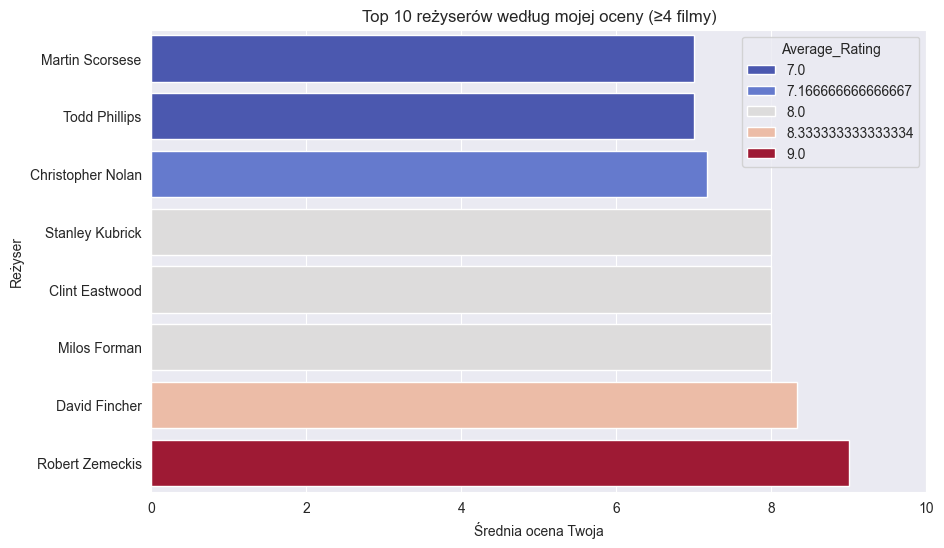

In [212]:
#Wyświetla top x reżyserów, których obejrzałem co najmniej prog filmów
x = 10


directors_df = df[['Directors']].drop_duplicates().copy()
directors_df['Watched_movies'] = directors_df['Directors'].map(df['Directors'].value_counts())

mean_ratings = df.groupby('Directors')['Your Rating'].mean()
directors_df['Average_Rating'] = directors_df['Directors'].map(mean_ratings)

filtered_df = directors_df[directors_df['Watched_movies'] >= prog_rezyser]

top_directors = filtered_df.sort_values(by='Average_Rating', ascending=False, ignore_index=True)
top_directors.drop_duplicates(subset='Directors', inplace=True)

print(f"Top 10 reżyserów według mojej oceny (przynajmniej {prog_rezyser} filmy):")
print(top_directors.head(x))

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_directors.head(x).sort_values('Average_Rating', ascending=True),
    x='Average_Rating',
    y='Directors',
    palette='coolwarm',
    hue='Average_Rating',
)
plt.title(f'Top {x} reżyserów według mojej oceny (≥{prog} filmy)')
plt.xlabel('Średnia ocena Twoja')
plt.ylabel('Reżyser')
plt.xlim(0, 10)
plt.show()

In [ ]:
#Wyświetla x najwyżej ocenianych filmów wg. IMDb, które obejrzałem
x=5

top_movies = df.sort_values(by='IMDb Rating', ascending=False, ignore_index=True)
print(top_movies[['Title', 'IMDb Rating', 'Your Rating']].head(x))


In [ ]:
#Odchylenie mojej oceny od oceny IMDb
dif = df['Your Rating'].mean()-df['IMDb Rating'].mean()

if dif < 0:
    print(f'Twoja ocena jest zazwyczaj niższa o {np.abs(dif)} od IMDb')
elif dif > 0:
    print(f'Twoja ocena jest zazwyczaj wyższa o {np.abs(dif)} od IMDb')

In [ ]:
#Wyświetla x najstarszych i najnowszych filmów wraz z ocenami
x = 10

oldest_movies = df.sort_values(by=['Year'], ascending=True, ignore_index=True)
print(f'{x} najstarszych -średnia ocena {oldest_movies['Your Rating'].head(x).mean()} \n'+str(oldest_movies[['Title','Year','Your Rating']].head(10))+'\n')

latest_movies = df.sort_values(by=['Year'], ascending=False, ignore_index=True)
print(f'{x} najnowszych -średnia ocena {latest_movies['Your Rating'].head(x).mean()}\n'+str(latest_movies[['Title','Year','Your Rating']].head(10)))

In [ ]:
#Wyświetla ile filmów obejrzałem w danej dekadzie i średnie oceny w dekadzie
bins = range(df['Year'].min()//10*10, df['Year'].max()//10*10 + 10, 10)
labels = [f"{b}s" for b in bins[:-1]]
df['Decade'] = pd.cut(df['Year'], bins=bins, labels=labels, right=False)

grouped = df.groupby('Decade',observed=False).agg(
    Movie_Count=('Title', 'count'),
    Avg_IMDb_Rating=('IMDb Rating', 'mean')
).reset_index()


plt.figure(figsize=(8,5))
sns.barplot(data=grouped, x='Decade', y='Movie_Count', palette='viridis', hue='Decade')
plt.title('Liczba filmów w każdej dekadzie')
plt.ylabel('Liczba filmów')
plt.xlabel('Dekada')

plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=grouped, x='Decade', y='Avg_IMDb_Rating', palette='magma',hue='Decade')
plt.title('Średnia ocena IMDb w każdej dekadzie')
plt.ylabel('Średnia ocena IMDb')
plt.xlabel('Dekada')
plt.ylim(0, 10)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.show()